In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_4328/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import os
import copy
import hist
from coffea import util
import numpy as np
import itertools
import pandas as pd
import uproot
import mplhep as hep

In [3]:
APVDir = {
    'preVFP': 'APV/',
    'postVFP': 'noAPV/'
}

In [4]:
import LoadData as LD

SingleMuOut = {}
# START EDITING AGAIN HERE, AS WELL AS THE LD FUNCTION #
for y in [2016, 2017, 2018]:
    SingleMuOut[str(y)] = LD.SingleMu_Unweighted(y)

In [5]:
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
import HelpfulPlottingDefs as hpd
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
# ttagcats = ["0t", ">=1t"]
ttagcats = [0, 1]

In [6]:
maindirectory = os.getcwd() 

# Plot individual years

In [7]:
Zoom = False
Condition = False
saveOn = False
year = '2017'

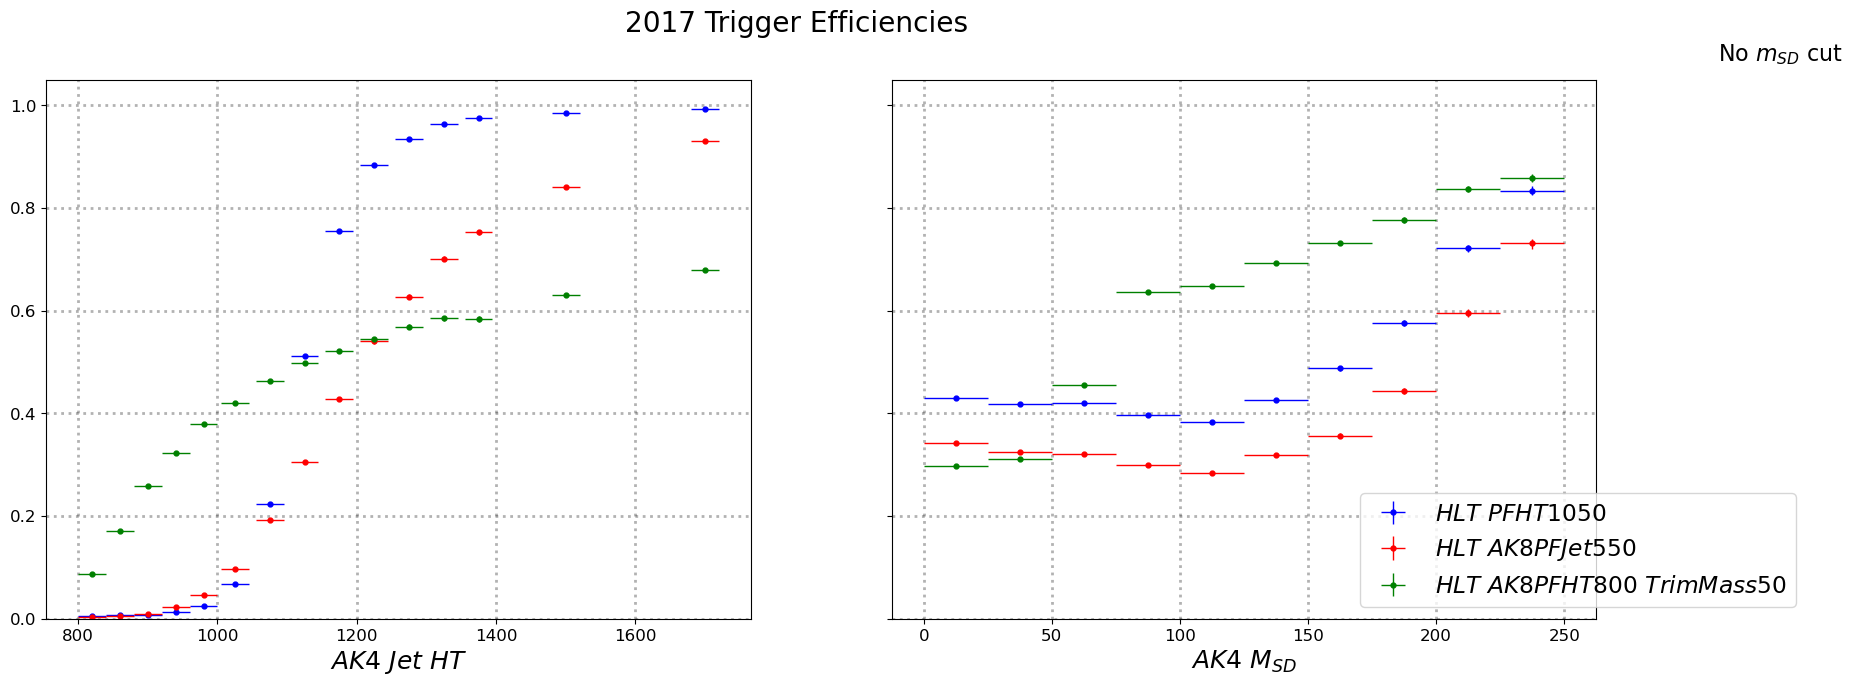

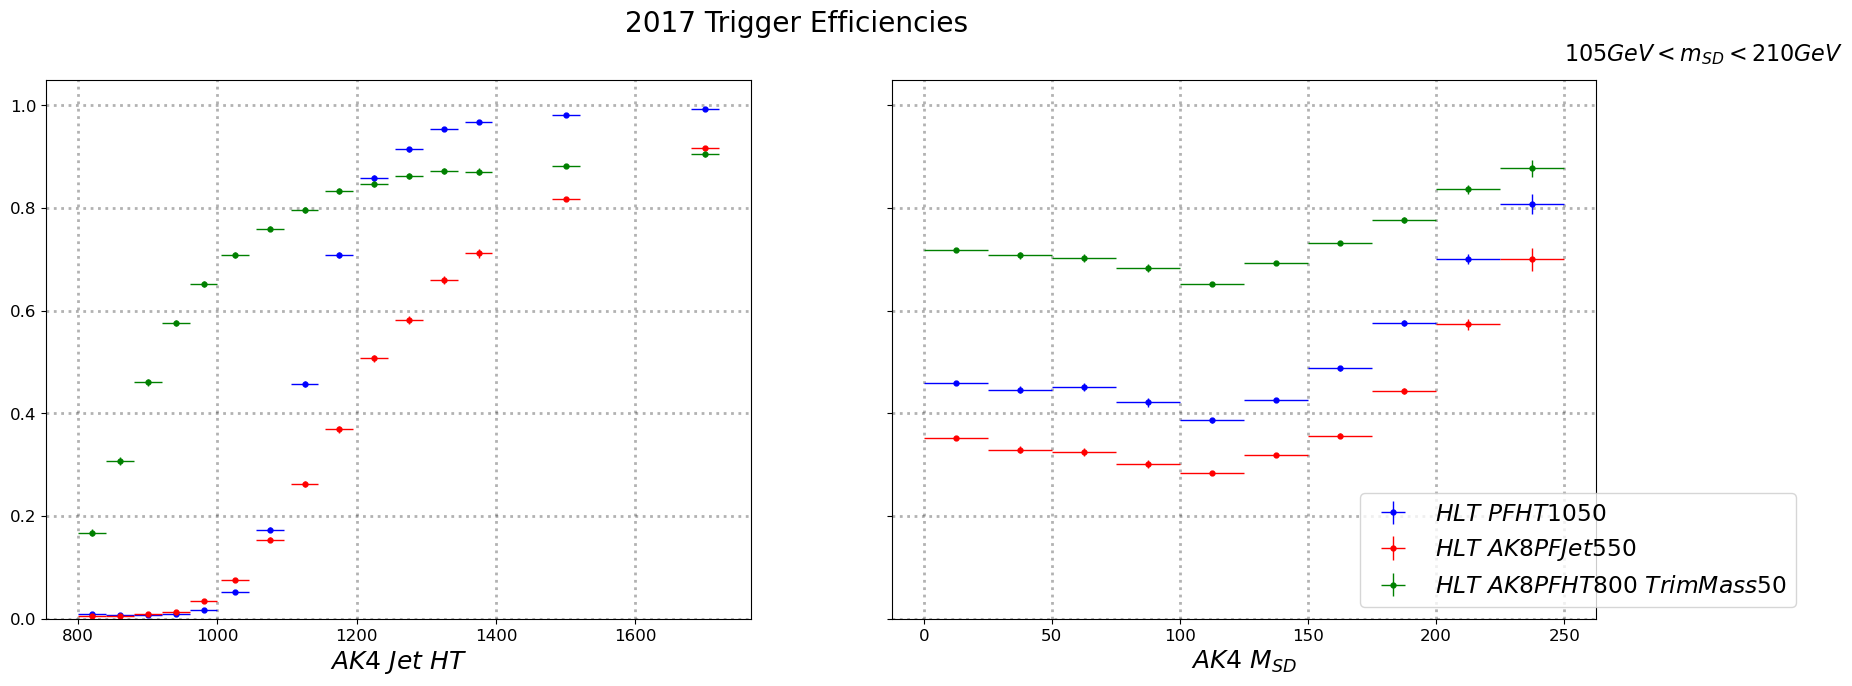

In [8]:
for cat in ttagcats:
    #---- Histogram Window Config. ----# 
    plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    
    fig, (ax, bx) = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(20,7),
        sharey=True
        # sharex=True
    )
    
    if Condition:
        plt.suptitle(year + ' Trigger Combination Efficiencies', fontsize='x-large')
    else:
        plt.suptitle(year + ' Trigger Efficiencies', fontsize='x-large')
    fig.subplots_adjust(hspace=0.7)
    
    if Zoom:
        zoom = '_zoom'
        xerr = 12.5
    else:
        zoom = ''
        xerr = 20.
        
    if Condition:
        condition = 'condition'
    else:
        condition = 'trigger'
    
        
    Denominator_ht = LD.AddEraHistsSingleMu(SingleMuOut[year], int(year), f'condition_denominator{zoom}', 'ht', cat)
    Denominator_sd = LD.AddEraHistsSingleMu(SingleMuOut[year], int(year), f'condition_denominator{zoom}', 'sd', cat)
    # ------------------------------------------------------------------------------------- #
    Numerator1_ht = LD.AddEraHistsSingleMu(SingleMuOut[year], int(year), f'{condition}1_numerator{zoom}', 'ht', cat)
    Numerator2_ht = LD.AddEraHistsSingleMu(SingleMuOut[year], int(year), f'{condition}2_numerator{zoom}', 'ht', cat)
    Numerator3_ht = LD.AddEraHistsSingleMu(SingleMuOut[year], int(year), f'{condition}3_numerator{zoom}', 'ht', cat)
    # ------------------------------------------------------------------------------------- #
    Numerator1_sd = LD.AddEraHistsSingleMu(SingleMuOut[year], int(year), f'{condition}1_numerator', 'sd', cat)
    Numerator2_sd = LD.AddEraHistsSingleMu(SingleMuOut[year], int(year), f'{condition}2_numerator', 'sd', cat)
    Numerator3_sd = LD.AddEraHistsSingleMu(SingleMuOut[year], int(year), f'{condition}3_numerator', 'sd', cat)
    # ------------------------------------------------------------------------------------- #

    EffPlot1_ht = hpd.plotefficiency(Numerator1_ht, Denominator_ht, ax, 'errorbar', '.', 7., 'b', 0.1, xerr)
    EffPlot1_sd = hpd.plotefficiency(Numerator1_sd, Denominator_sd, bx, 'errorbar', '.', 7., 'b', 0.1, 12.5)

    EffPlot2_ht = hpd.plotefficiency(Numerator2_ht, Denominator_ht, ax, 'errorbar', '.', 7., 'r', 0.1, xerr)
    EffPlot2_sd = hpd.plotefficiency(Numerator2_sd, Denominator_sd, bx, 'errorbar', '.', 7., 'r', 0.1, 12.5)

    EffPlot3_ht = hpd.plotefficiency(Numerator3_ht, Denominator_ht, ax, 'errorbar', '.', 7., 'g', 0.1, xerr)
    EffPlot3_sd = hpd.plotefficiency(Numerator3_sd, Denominator_sd, bx, 'errorbar', '.', 7., 'g', 0.1, 12.5)
        
        
    if Condition:
            leg = bx.legend(labels=[r'Combination$_1$', r'Combination$_2$', r'Combination$_3$'], 
                            bbox_to_anchor=(1.30, 0.0), loc='lower right', fontsize='large')
    else:
        if year == '2016':
            leg = bx.legend(labels=[r'$HLT\ PFHT900$', r'$HLT\ AK8PFJet450$', r'$HLT\ AK8PFJet360\ TrimMass30$'], 
                            bbox_to_anchor=(1.30, 0.0), loc='lower right', fontsize='large')
        elif year == '2017':
            leg = bx.legend(labels=[r'$HLT\ PFHT1050$', r'$HLT\ AK8PFJet550$', r'$HLT\ AK8PFHT800\ TrimMass50$'], 
                            bbox_to_anchor=(1.30, 0.0), loc='lower right', fontsize='large')
        else:
            leg = bx.legend(labels=[r'$HLT\ PFHT1050$', r'$HLT\ AK8PFHT800\ TrimMass50$', r'$HLT\ AK8PFJet400\ TrimMass30$'], 
                            bbox_to_anchor=(1.30, 0.0), loc='lower right', fontsize='large')
            

    ax.grid(axis="x", color="k", alpha=.3, linewidth=2, linestyle=":")
    bx.grid(axis="x", color="k", alpha=.3, linewidth=2, linestyle=":")

    ax.grid(axis="y", color="k", alpha=.3, linewidth=2, linestyle=":")
    bx.grid(axis="y", color="k", alpha=.3, linewidth=2, linestyle=":")

    ax.set_ylim(bottom=0.0, top=1.05)
    bx.set_ylim(bottom=0.0, top=1.05)
    
    if Zoom:
        ax.set_ylim(bottom=0.84, top=1.01)
        bx.set_ylim(bottom=0.84, top=1.01)
        ax.set_xlim(1200, 1400)

    Cat_legend_entry = None
    if cat == 0:
        Cat_legend_entry = "No $m_{SD}$ cut"
        fnc = '_noSD'
    else:
        Cat_legend_entry = "$105GeV < m_{SD} < 210GeV$"
        fnc = '_SD'
    leg2 = plt.text(1.35, 1.07, Cat_legend_entry,
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=bx.transAxes
               )
    
    if saveOn:
        SaveDirectory = f'{maindirectory}/TriggerAnalysisPlots/{year}/' # Directory where trigger analysis plots will be saved
        hpd.DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
        if Condition:
            filename = 'TriggerCombos' + fnc + zoom +'.png'
        else:
            filename = 'TriggerEffs' + fnc + zoom + '.png'
        plt.savefig(SaveDirectory+filename, bbox_inches="tight")
        print(SaveDirectory+filename)

# Best Combination of Triggers for Each Year

In [9]:
Zoom = False
saveOn = False

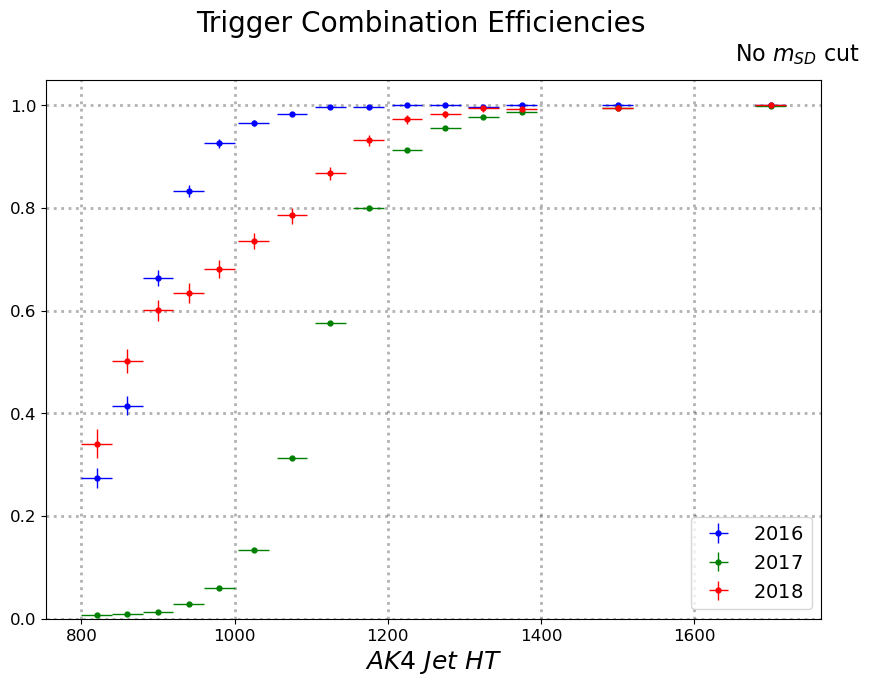

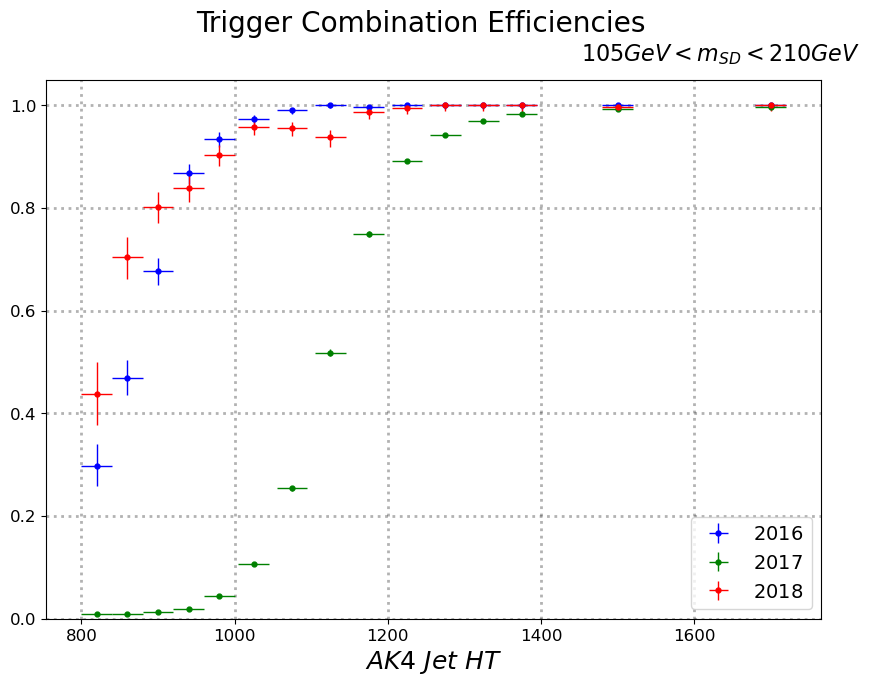

In [10]:
for cat in ttagcats:
    #---- Histogram Window Config. ----# 
    plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
    })
    
    fig, (ax) = plt.subplots(
        nrows=1,
        ncols=1,
        figsize=(10,7),
        sharey=True
        # sharex=True
    )
    
    plt.suptitle('Trigger Combination Efficiencies', fontsize='x-large')
    fig.subplots_adjust(hspace=.07)
    
    if Zoom:
        zoom = '_zoom'
        xerr = 12.5
    else:
        zoom = ''
        xerr = 20.
        
    Denominator_ht2016 = LD.AddEraHistsSingleMu(SingleMuOut['2016'], 2016, f'condition_denominator{zoom}', 'ht', cat)
    # Denominator_sd2016 = LD.AddEraHistsSingleMu(SingleMuOut['2016'], 2016, f'condition_denominator{zoom}', 'sd', cat)
    Denominator_ht2017 = LD.AddEraHistsSingleMu(SingleMuOut['2017'], 2017, f'condition_denominator{zoom}', 'ht', cat)
    # Denominator_sd2017 = LD.AddEraHistsSingleMu(SingleMuOut['2017'], 2017, f'condition_denominator{zoom}', 'sd', cat)
    Denominator_ht2018 = LD.AddEraHistsSingleMu(SingleMuOut['2018'], 2018, f'condition_denominator{zoom}', 'ht', cat)
    # Denominator_sd2018 = LD.AddEraHistsSingleMu(SingleMuOut['2018'], 2018, f'condition_denominator{zoom}', 'sd', cat)
    # ------------------------------------------------------------------------------------- #
    Numerator1_ht = LD.AddEraHistsSingleMu(SingleMuOut['2016'], 2016, f'condition3_numerator{zoom}', 'ht', cat)
    Numerator2_ht = LD.AddEraHistsSingleMu(SingleMuOut['2017'], 2017, f'condition2_numerator{zoom}', 'ht', cat)
    Numerator3_ht = LD.AddEraHistsSingleMu(SingleMuOut['2018'], 2018, f'condition3_numerator{zoom}', 'ht', cat)
    # ------------------------------------------------------------------------------------- #
    # Numerator1_sd = LD.AddEraHistsSingleMu(SingleMuOut['2016'], 2016, f'condition3_numerator{zoom}', 'sd', cat)
    # Numerator2_sd = LD.AddEraHistsSingleMu(SingleMuOut['2017'], 2017, f'condition2_numerator{zoom}', 'sd', cat)
    # Numerator3_sd = LD.AddEraHistsSingleMu(SingleMuOut['2018'], 2018, f'condition3_numerator{zoom}', 'sd', cat)
    # ------------------------------------------------------------------------------------- #

    EffPlot1_ht = hpd.plotefficiency(Numerator1_ht, Denominator_ht2016, ax, 'errorbar', '.', 7., 'b', 0.1, xerr)
    # EffPlot1_sd = hpd.plotefficiency(Numerator1_sd, Denominator_sd2016, bx, 'errorbar', '.', 7., 'b')

    EffPlot2_ht = hpd.plotefficiency(Numerator2_ht, Denominator_ht2017, ax, 'errorbar', '.', 7., 'g', 0.1, xerr)
    # EffPlot2_sd = hpd.plotefficiency(Numerator2_sd, Denominator_sd2017, bx, 'errorbar', 'x', 10., 'g')

    EffPlot3_ht = hpd.plotefficiency(Numerator3_ht, Denominator_ht2018, ax, 'errorbar', '.', 7., 'r', 0.1, xerr)
    # EffPlot3_sd = hpd.plotefficiency(Numerator3_sd, Denominator_sd2018, bx, 'errorbar', 's', 6., 'r')
        
    
    leg = ax.legend(labels=[r'$2016$', r'$2017$', r'$2018$'], 
                            loc='lower right', fontsize='medium')
            

    ax.grid(axis="x", color="k", alpha=.3, linewidth=2, linestyle=":")
    # bx.grid(axis="x", color="k", alpha=.3, linewidth=2, linestyle=":")

    ax.grid(axis="y", color="k", alpha=.3, linewidth=2, linestyle=":")
    # bx.grid(axis="y", color="k", alpha=.3, linewidth=2, linestyle=":")

    ax.set_ylim(bottom=0.0, top=1.05)
    # # bx.set_ylim(bottom=0.1, top=1.1)
    
    ax.xerr = 50.
    
    if Zoom:
        ax.set_ylim(bottom=0.84, top=1.01)
        ax.set_xlim(1200, 1400)
        # bx.set_ylim(bottom=0.84, top=1.01)

    Cat_legend_entry = None
    if cat == 0:
        Cat_legend_entry = "No $m_{SD}$ cut"
        fnc = '_noSD'
    else:
        Cat_legend_entry = "$105GeV < m_{SD} < 210GeV$"
        fnc = '_SD'
    leg2 = plt.text(1.05, 1.07, Cat_legend_entry,
                fontsize=16,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes
               )
    
    if saveOn:
        SaveDirectory = f'{maindirectory}/TriggerAnalysisPlots/' # Directory where trigger analysis plots will be saved
        hpd.DoesDirectoryExist(SaveDirectory) # no need to create the directory several times if it exists already
        filename = 'MostEfficientTriggerCombination' + fnc + zoom +'.png'
        plt.savefig(SaveDirectory+filename, bbox_inches="tight")
        print(SaveDirectory+filename)